# Supplementary Fig. 12a: Correlates of *Xenopus tropicalis* recombination rate

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
source_data_path = 'SourceData'
sup_fig_12 = 'Supplementary_Fig.12'

paths_files_fig_12 = os.path.join(source_data_path,sup_fig_12)

#input files:
RR_CM_PC_OF_file = os.path.join(paths_files_fig_12,"Supplementary_Fig.12a.tsv")

#Setup out file:
out_dir_figs = paths_files_fig_12

In [3]:
# Load files:
RR_CM_PC_OF = pd.read_csv(RR_CM_PC_OF_file, sep='\t')


## Fig S13.A: Correlations Recombination Rates and Repeats 

python/3.9-anaconda-2021.11/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
python/3.9-anaconda-2021.11/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Saved as SourceData/Supplementary_Fig.12/Recombination_Rate.pdf


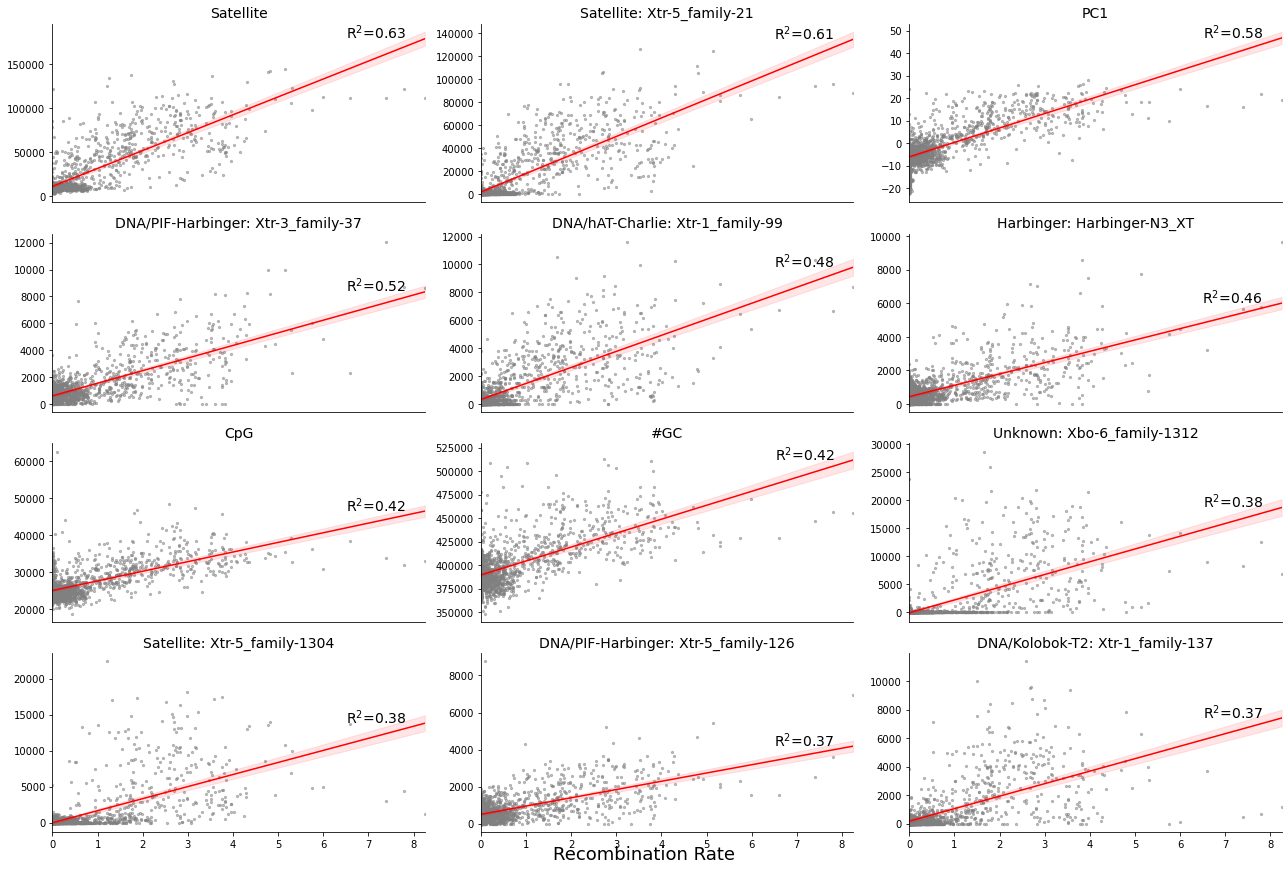

()

In [4]:
#Supplementary Figure 13A
import statsmodels.api as sm



def plot_correlations_with_RecombinationRates(list_Yaxis, x_axis_name):
    n_cols = 3
    n_rows = len(list_Yaxis)/n_cols
    if np.mod(len(list_Yaxis),n_cols):
        n_rows = n_rows +1
        
    fig = plt.figure(figsize=(18,n_rows*3))
    fig.subplots_adjust(hspace=0.25, wspace=0.25)
    
    if x_axis_name == '':
        x_axis_name = 'Smooth_Recombination_Rate'
        X = np.array(RR_CM_PC_OF['Smooth_Recombination_Rate'])
        x_axis_label = 'Recombination Rate'
    else:
        X = np.array(RR_CM_PC_OF[x_axis_name])
        x_axis_label = x_axis_name
        
    for i in range(0, len(list_Yaxis)):
        ax = fig.add_subplot(int(n_rows), int(n_cols), i+1)
        
        y_name = list_Yaxis[i]
        Y = np.array(RR_CM_PC_OF[y_name])
        
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        X_plot = np.linspace(min(X),max(X),1000)
        Y_plot = X_plot*results.params[1] + results.params[0]
        ax.scatter(X,Y,s=5, alpha=0.5,color='gray')
        ax.plot(X_plot, Y_plot, color='red')
        ax.fill_between(X_plot, X_plot*results.conf_int(0.05)[1][0]+ results.conf_int(0.05)[0][0],X_plot*results.conf_int(0.05)[1][1]+ results.conf_int(0.05)[0][1], color='red', alpha=0.1)        
        R_value = ''.join(("R^2=",str(results.rsquared_adj)[:4]))
               
        if y_name == 'GC_':
            y_name = '#GC'
        
        ax.set_title(''.join((y_name)), fontsize=14)
        ax.set_xlim(min(X), max(X))
        #ax.set_ylim(max(0, min(Y_plot)*.8), max(Y_plot)*1.2)
   ##new     ax.set_ylim( min(Y_plot), max(Y_plot)*1.2)
        ax.text(max(X)*.95,max(Y_plot), ''.join(("R$^2$=",str(results.rsquared_adj)[:4])),fontsize=14, ha='right')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if i < n_rows * n_cols - n_cols :
            ax.get_xaxis().set_ticks([])
    plt.figtext(0.5,0.0,x_axis_label, ha='center', fontsize=18)
    plt.tight_layout()
    out_fig_name = os.path.join(out_dir_figs,paths_files_fig_12,x_axis_label+'.pdf').replace(' ','_').replace(':','-')
    print("Saved as", out_fig_name)
    plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)
    plt.show()
    return()


Rec_Rate_correlations_with_other_features  = RR_CM_PC_OF.corr(method='pearson')['Smooth_Recombination_Rate'].sort_values()
Rec_rate_correlations_dict = Rec_Rate_correlations_with_other_features.to_dict()

list_Yaxis = [
    'Satellite',
    'Satellite: Xtr-5_family-21',
    'PC1',
    'DNA/PIF-Harbinger: Xtr-3_family-37',
    'DNA/hAT-Charlie: Xtr-1_family-99',
    'Harbinger: Harbinger-N3_XT',
    'CpG',
    'GC_',
    'Unknown: Xbo-6_family-1312',
    'Satellite: Xtr-5_family-1304',
    'DNA/PIF-Harbinger: Xtr-5_family-126',
    'DNA/Kolobok-T2: Xtr-1_family-137'
]

plot_correlations_with_RecombinationRates(list_Yaxis,'')


# The majority of the Satellite class of repeats in X. tropicalis is Xtr-5_family-21 has a median length of 777bp and a max of 15,050bp.



#Figure S13A